# [On sums of graph eigenvalues](https://arxiv.org/pdf/1308.5340.pdf)

In [1]:
import numpy as np
import networkx as nx
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


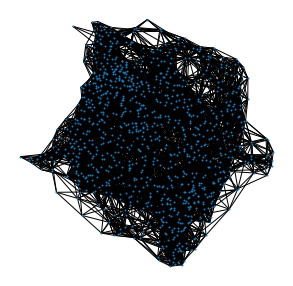

In [2]:
d = 3
N = 1000
radius = (np.log(N)/N) ** (1/d) # to likely ensure connectednessg
G = nx.random_geometric_graph(N, radius=radius, dim=d)
pos = nx.spring_layout(G)

# plot the graph
fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1)

nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=1)
ax.axis('off')
plt.show()

In [3]:
def laplacian_spectrum(G, normalization: str = None):
    """Compute spectral decomposition of the graph
    Laplacian with various normalization options.
    """
    # Graph Laplacian
    L = nx.laplacian_matrix(G).A

    if normalization == 'random_walk':
        D = L.diagonal()
        D_inv = np.diag(1/D)
        L = np.dot(D_inv, L)
    elif normalization == 'sym':
        D = L.diagonal()
        D_inv_sqrt = np.diag(1/np.sqrt(D))
        L = np.dot(D_inv_sqrt, np.dot(L, D_inv_sqrt))

    eigenvalues, eigenvectors = np.linalg.eigh(L)
        
    # Make sure they are now sorted in increasing order.
    # Also make sure both eigenvalues and eigenvectors 
    # are real; they should be but there is usually
    # a small numerical residual imaginary part.
    idx = eigenvalues.argsort()
    eigenvalues = np.real(eigenvalues[idx])
    eigenvectors = np.real(eigenvectors[:,idx])
    return eigenvalues, eigenvectors

In [4]:
eigenvalues, _ = laplacian_spectrum(G)
eigenvalues_rw, _ = laplacian_spectrum(G, normalization='random_walk')
eigenvalues_sym, _ = laplacian_spectrum(G, normalization='sym')

In [5]:
idx = np.linspace(1, N, N)
hs_law = [
    np.pi ** 2 / 3 * G.number_of_edges() * 
    (k / G.number_of_nodes()) ** (1 + 2 / d) for k in idx
]

# Only valid for the sum of the smallest eigenvalues

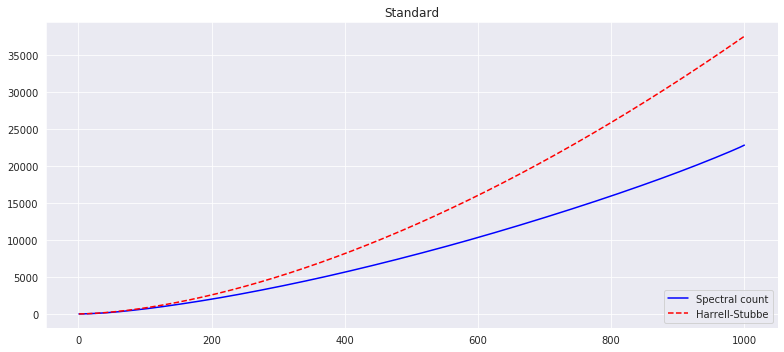

In [7]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)

    ax.plot(idx, np.cumsum(eigenvalues), color='b', label='Spectral count')
    ax.plot(idx, hs_law, color='r', linestyle='dashed', label='Harrell-Stubbe')
    ax.set_title('Standard')
    ax.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()